In [3]:
import pandas as pd
import numpy as np

import requests
import openpyxl as xl
import time
import json

from sklearn import preprocessing

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

import warnings
warnings.filterwarnings(action='ignore') # 경고메세지 숨기기

In [4]:
from pathlib import Path
import matplotlib.pylab as plt
import seaborn as sns

In [5]:
df = pd.read_excel("fin_dataset_ecodf.xlsx")
df

,gd_nm,goo_nm,dong_nm,dong_ID,dong_area,one_ratio,sum_order,cc_value,count_zero,sum_trans,count_bicycle,count_green,count_school,count_top,air_value,ecocar_ratio,sum_waste,y,x
0,송파구 가락1동,송파구,가락1동,11710631,1.46,0.037487,73694,0,0,9040266,7,18,1,0,34.369960,0.0936,4271.9,37.496537,127.105726
1,송파구 가락2동,송파구,가락2동,11710632,1.34,0.056981,73694,10,0,5631398,5,0,2,1,34.369960,0.0671,4271.9,37.498639,127.126488
2,송파구 가락본동,송파구,가락본동,11710620,0.96,0.096536,73694,30,1,3081377,7,1,2,2,34.369960,0.0473,4271.9,37.495585,127.121830
3,강남구 개포1동,강남구,개포1동,11680660,1.27,0.070165,68999,0,0,1375563,3,2,3,0,31.975607,0.0697,5556.9,37.481925,127.057439
4,강남구 개포2동,강남구,개포2동,11680670,2.51,0.040364,68999,0,0,2063259,13,5,4,0,31.975607,0.0845,5556.9,37.489766,127.069056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,송파구 풍납1동,송파구,풍납1동,11710510,1.37,0.106685,73694,0,0,1185664,4,3,0,0,34.369960,0.0516,4271.9,37.538055,127.122215
60,송파구 풍납2동,송파구,풍납2동,11710520,0.77,0.093297,73694,0,1,2236027,12,12,3,3,34.369960,0.0631,4271.9,37.528779,127.116814
61,중구 필동,중구,필동,11140570,1.14,0.172066,22818,0,0,7107052,4,8,0,6,35.767542,0.0668,1533.7,37.560148,126.995572
62,중구 황학동,중구,황학동,11140670,0.33,0.175523,22818,0,0,1243065,2,0,0,1,35.767542,0.0535,1533.7,37.568542,127.020827


In [6]:
round(df.describe(),3)

,dong_ID,dong_area,one_ratio,sum_order,cc_value,count_zero,sum_trans,count_bicycle,count_green,count_school,count_top,air_value,ecocar_ratio,sum_waste,y,x
count,6.400000e+01,64.000,64.000,64.000,64.000,64.000,6.400000e+01,64.000,64.000,64.000,64.00,64.000,64.000,64.000,64.000,64.000
mean,1.149587e+07,1.300,0.110,60156.031,15.562,0.078,7.341243e+06,8.094,5.953,1.344,1.75,33.874,0.076,4071.853,37.515,127.067
std,6.554498e+05,0.950,0.068,20923.426,14.012,0.270,7.362140e+06,5.786,6.457,1.288,2.69,1.489,0.052,1523.529,0.029,0.054
min,6.666666e+06,0.260,0.012,22818.000,0.000,0.000,6.674170e+05,1.000,0.000,0.000,0.00,31.976,0.036,1533.700,37.464,126.918
25%,1.166556e+07,0.698,0.058,68999.000,0.000,0.000,2.296355e+06,4.000,1.000,0.000,0.00,31.976,0.053,4271.900,37.493,127.027
50%,1.168070e+07,1.020,0.097,68999.000,10.000,0.000,4.768470e+06,6.000,4.000,1.000,1.00,34.370,0.066,4271.900,37.506,127.071
75%,1.171058e+07,1.508,0.162,73694.000,30.000,0.000,9.146426e+06,10.000,8.500,2.000,2.00,34.370,0.076,5556.900,37.533,127.113
max,1.171072e+07,6.360,0.318,73694.000,30.000,1.000,3.468040e+07,26.000,27.000,4.000,17.00,35.768,0.366,5556.900,37.569,127.150


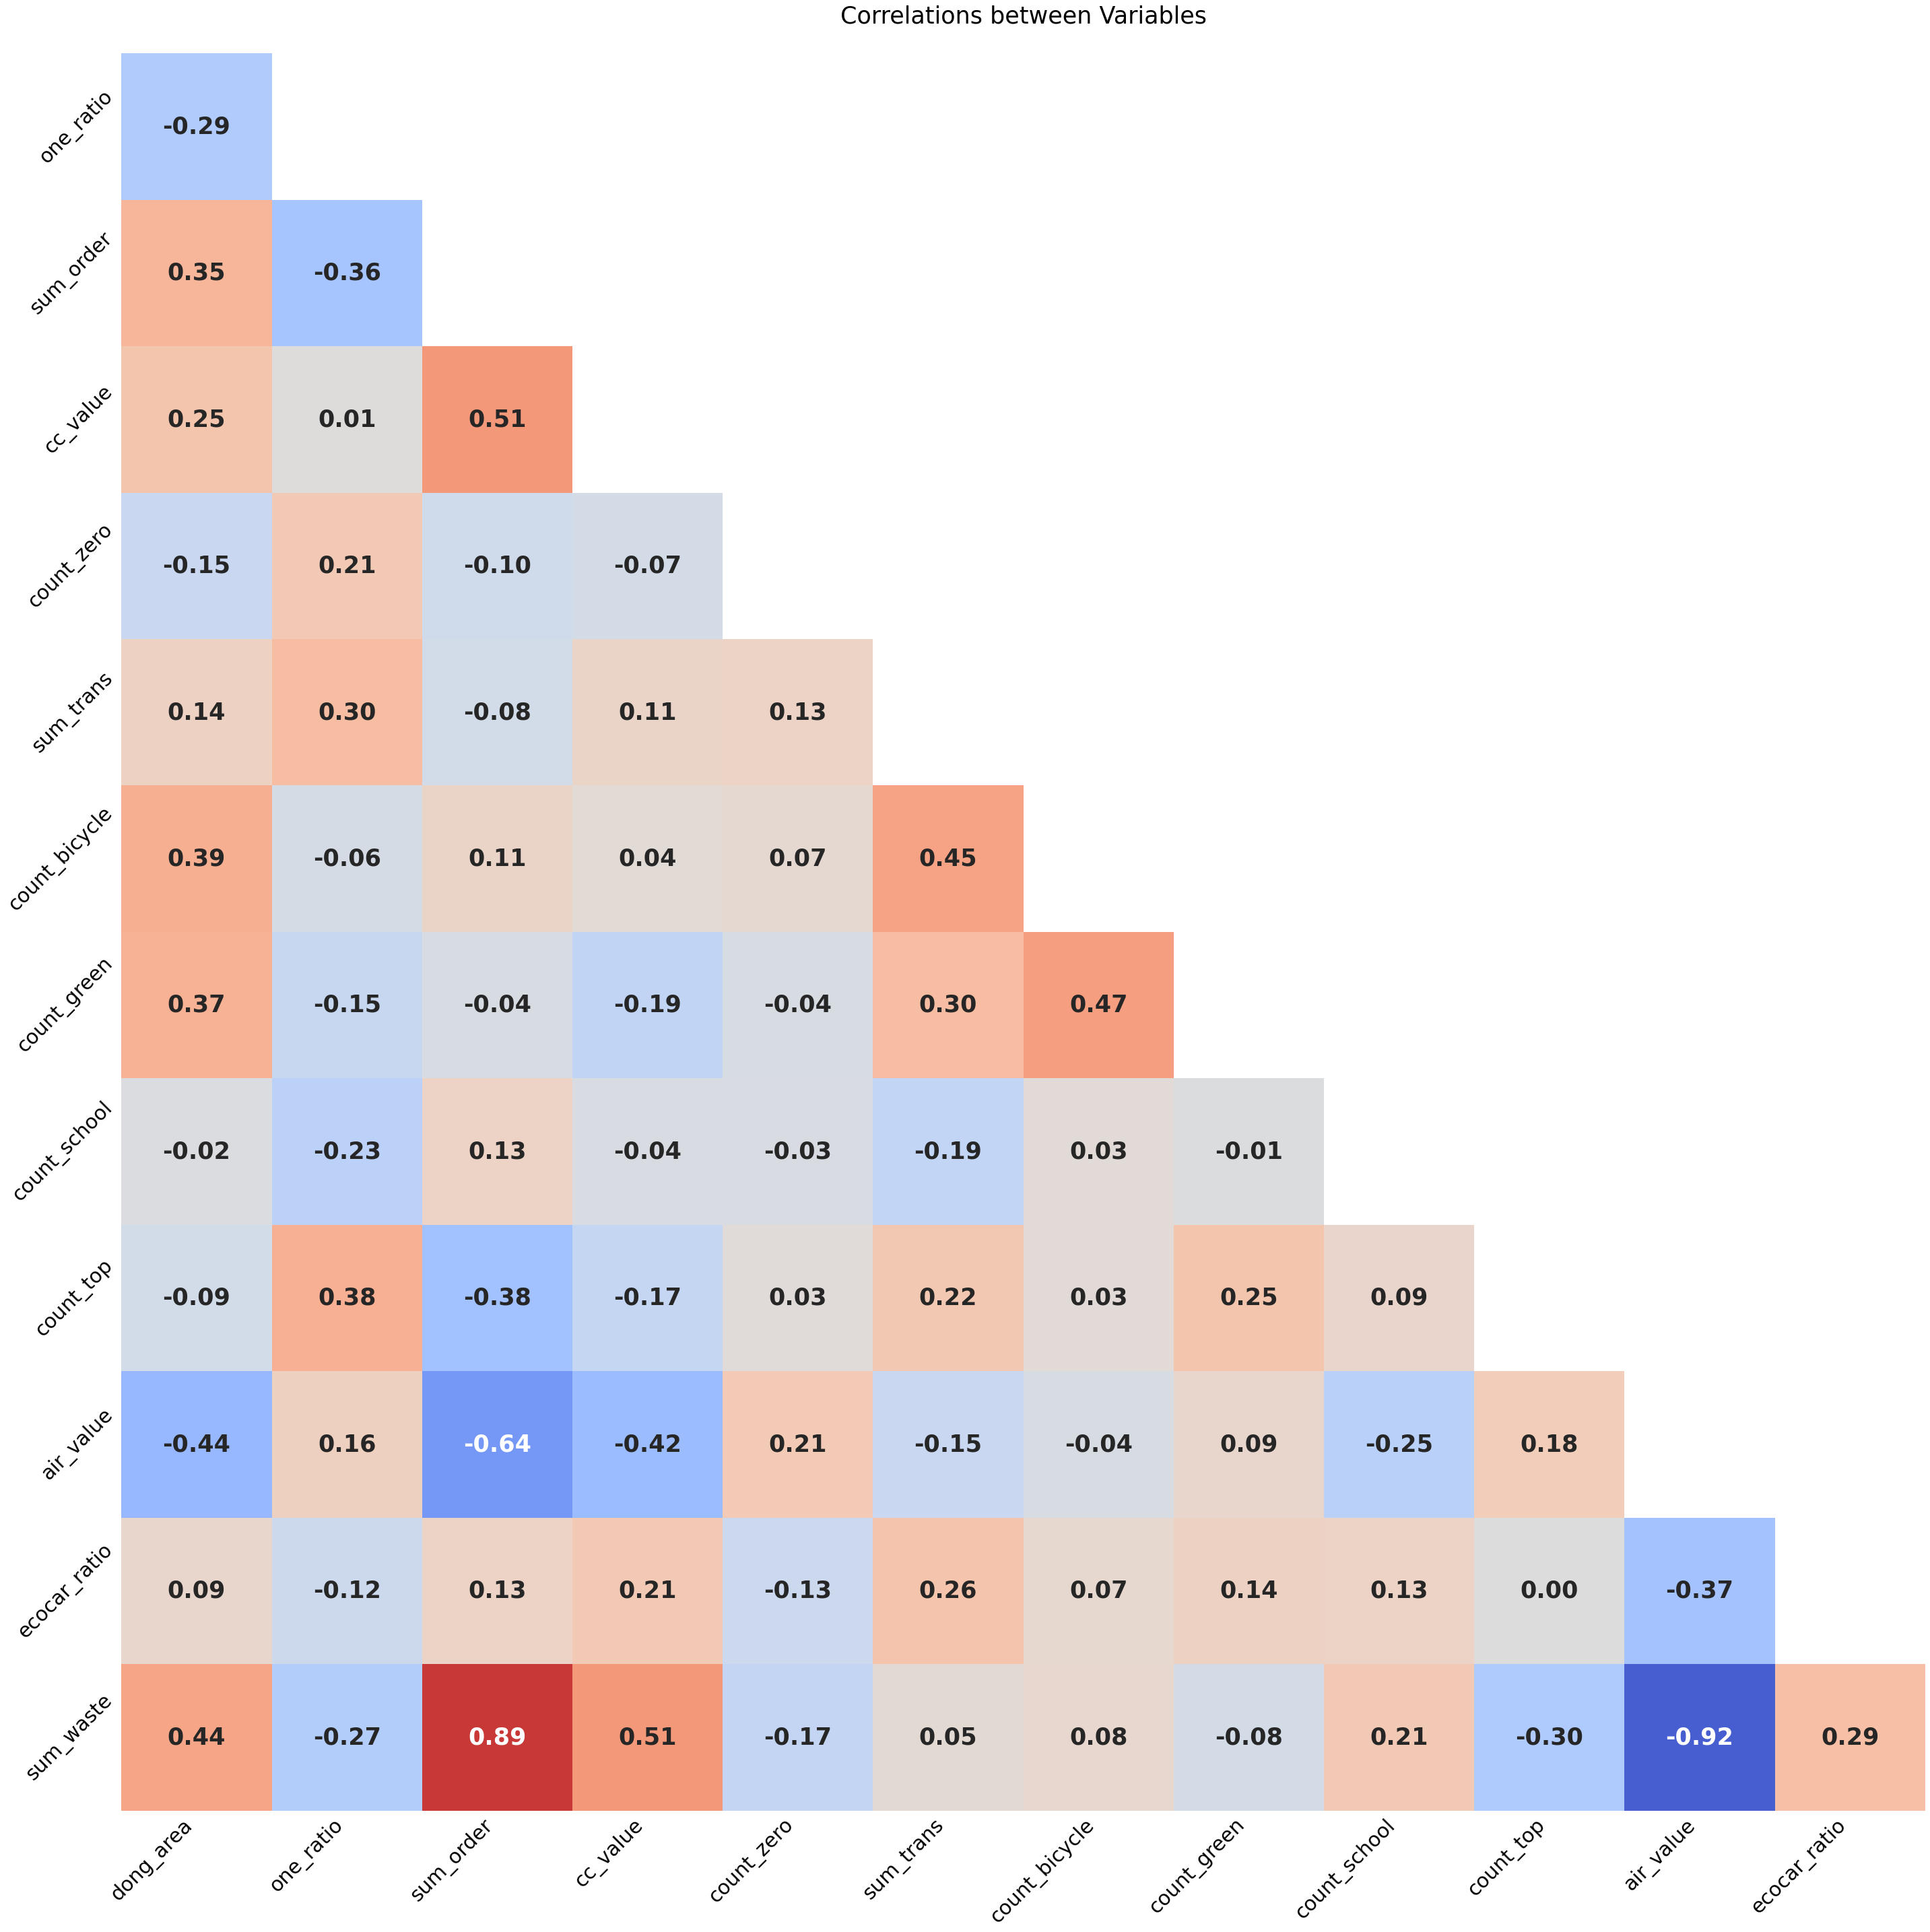

In [94]:
corr=df.drop(columns=['goo_nm', 'dong_nm', "gd_nm",'dong_ID','y', 'x']).corr()
mask=np.triu(np.ones_like(corr, dtype=bool))[1:,:-1]
corr=corr.iloc[1:,:-1].copy()
fig, ax = plt.subplots(figsize=(48,48))   
sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, center=0, annot=True, fmt='.2f', 
            cmap='coolwarm', annot_kws={'fontsize':35,'fontweight':'bold'}, cbar=False)
ax.tick_params(left=False,bottom=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right',fontsize=30)
ax.set_yticklabels(ax.get_yticklabels(), rotation=45, fontsize=30)
plt.title('Correlations between Variables\n', fontsize=35)
fig.show()

## 에코 value 구하기 - 다중회귀

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm

In [51]:
!pip install dmba

In [96]:
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

In [9]:
ecov = df[['count_bicycle',
       'count_green', 'count_school', 'count_top','ecocar_ratio']]
ecov

,count_bicycle,count_green,count_school,count_top,ecocar_ratio
0,7,18,1,0,0.0936
1,5,0,2,1,0.0671
2,7,1,2,2,0.0473
3,3,2,3,0,0.0697
4,13,5,4,0,0.0845
...,...,...,...,...,...
59,4,3,0,0,0.0516
60,12,12,3,3,0.0631
61,4,8,0,6,0.0668
62,2,0,0,1,0.0535


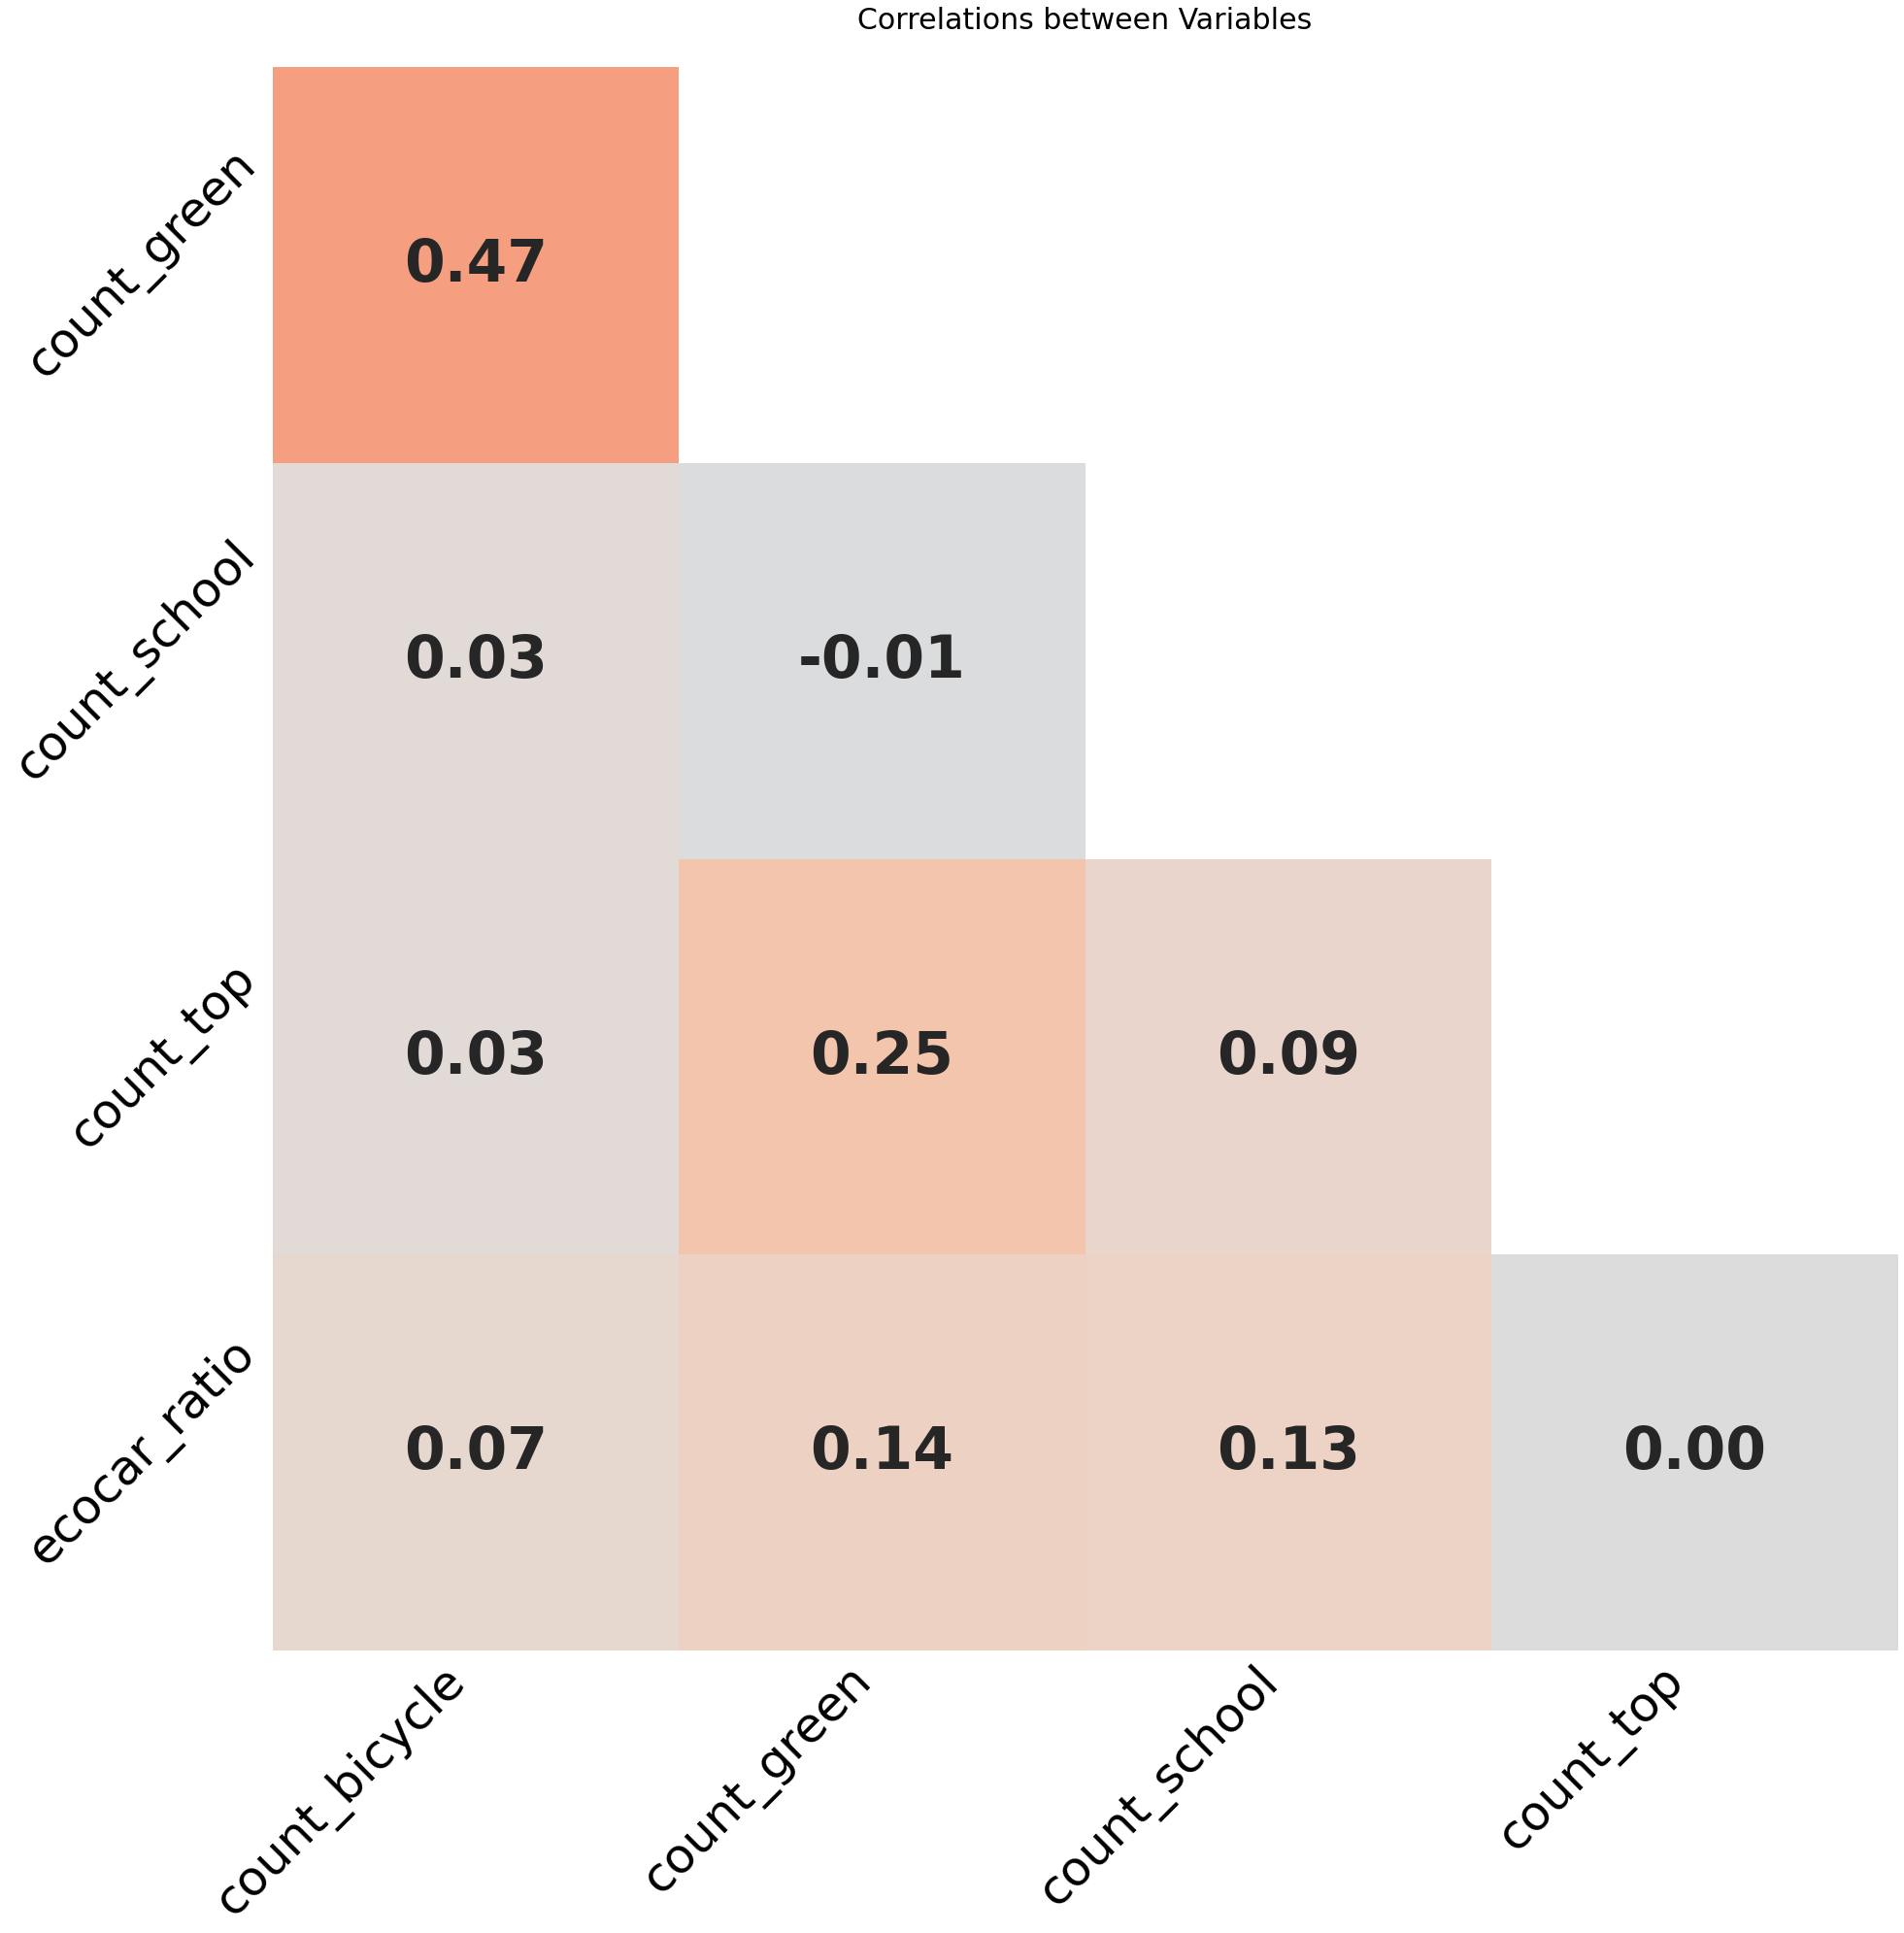

In [16]:
corr=ecov.corr()
mask=np.triu(np.ones_like(corr, dtype=bool))[1:,:-1]
corr=corr.iloc[1:,:-1].copy()
fig, ax = plt.subplots(figsize=(30,30))   
sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, center=0, annot=True, fmt='.2f', 
            cmap='coolwarm', annot_kws={'fontsize':60,'fontweight':'bold'}, cbar=False)
ax.tick_params(left=False,bottom=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right',fontsize=50)
ax.set_yticklabels(ax.get_yticklabels(), rotation=45, fontsize=50)
plt.title('Correlations between Variables\n', fontsize=30)
fig.show()

In [99]:
# standard 정규화를 통해 값의 범위를 일정하게 조정

scaler = MinMaxScaler()
data = scaler.fit_transform(ecov)

df_norm = pd.DataFrame(data, index = list(ecov.index), columns=list(ecov.columns))
df_norm

,count_bicycle,count_green,count_school,count_top,air_value,ecocar_ratio,sum_waste
0,0.24,0.666667,0.25,0.000000,0.631433,0.175704,0.680603
1,0.16,0.000000,0.50,0.058824,0.631433,0.095426,0.680603
2,0.24,0.037037,0.50,0.117647,0.631433,0.035444,0.680603
3,0.08,0.074074,0.75,0.000000,0.000000,0.103302,1.000000
4,0.48,0.185185,1.00,0.000000,0.000000,0.148137,1.000000
...,...,...,...,...,...,...,...
59,0.12,0.111111,0.00,0.000000,0.631433,0.048470,0.680603
60,0.44,0.444444,0.75,0.176471,0.631433,0.083308,0.680603
61,0.12,0.296296,0.00,0.352941,1.000000,0.094517,0.000000
62,0.04,0.000000,0.00,0.058824,1.000000,0.054226,0.000000


In [112]:
predictors = ['count_bicycle', 'count_green', 'count_school', 'count_top', 'ecocar_ratio','sum_waste']
outcome = "air_value"

X = df_norm[predictors]
y = df_norm[outcome]

#train_X, vaild_X, train_y, vaild_y = train_test_split(X, Y, test_size=0.5, random_state=1) 

eco_lm = LinearRegression()
eco_lm.fit(X, y)

print("Intercept", eco_lm.intercept_)
print()
print(pd.DataFrame({'Preditior': X.columns, 'coefficient': eco_lm.coef_}))

Intercept 1.1399695807541168

       Preditior  coefficient
0  count_bicycle     0.029132
1    count_green     0.092348
2   count_school    -0.035592
3      count_top    -0.258092
4   ecocar_ratio    -0.286347
5      sum_waste    -0.942374


In [109]:
predictors = ['count_bicycle', 'count_green', 'count_school', 'count_top', 'ecocar_ratio','sum_waste']
outcome = "air_value"

X = pd.get_dummies(df_norm[predictors],drop_first=True)
Y = df_norm[outcome]

train_X, vaild_X, train_y, vaild_y = train_test_split(X, Y, test_size=0.5, random_state=1) 

eco_lm = LinearRegression()
eco_lm.fit(train_X, train_y)

print("Intercept", eco_lm.intercept_)
print()
print(pd.DataFrame({'Preditior': X.columns, 'coefficient': eco_lm.coef_}))

Intercept 1.3233400310229664

       Preditior  coefficient
0  count_bicycle     0.000871
1    count_green    -0.059629
2   count_school     0.071876
3      count_top    -0.847820
4   ecocar_ratio    -0.176424
5      sum_waste    -1.182928


In [101]:
## 가장 중요한 변수를 찾기위해 전역탐색 이용
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    pred_y = model.predict(train_X[variables])
    # we negate as score is optimized to be as low as possible
    return -adjusted_r2_score(train_y, pred_y, model)

In [102]:
allVariables = train_X.columns
results = exhaustive_search(allVariables, train_model, score_model)

In [103]:
data = []
for result in results:
    model = result['model']
    variables = result['variables']
    AIC = AIC_score(train_y, model.predict(train_X[variables]), model)
    
    d = {'n': result['n'], 'r2adj': -result['score'], 'AIC': AIC}
    d.update({var: var in result['variables'] for var in allVariables})
    data.append(d)
pd.set_option('display.width', 100)
print(pd.DataFrame(data, columns=('n', 'r2adj', 'AIC') + tuple(sorted(allVariables))))
pd.reset_option('display.width') # AIC값이 낮을 수록 좋음

   n     r2adj        AIC  count_bicycle  count_green  count_school  count_top  ecocar_ratio  \
0  1  0.833912 -28.487035          False        False         False      False         False   
1  2  0.870725 -37.079399          False        False         False       True         False   
2  3  0.880004 -39.011387          False        False         False       True          True   
3  4  0.878218 -37.584373           True        False         False       True          True   
4  5  0.874922 -35.738760           True        False          True       True          True   
5  6  0.871403 -33.890807           True         True          True       True          True   

   sum_waste  
0       True  
1       True  
2       True  
3       True  
4       True  
5       True  


In [104]:
## 예측변수를 줄이기 위해 단계적 회귀
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_X[variables]), model)

In [105]:
best_model, best_variables = stepwise_selection(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: count_bicycle, count_green, count_school, count_top, ecocar_ratio, sum_waste
Start: score=38.77, constant
Step: score=-28.49, add sum_waste
Step: score=-37.08, add count_top
Step: score=-39.01, add ecocar_ratio
Step: score=-39.01, unchanged None
['sum_waste', 'count_top', 'ecocar_ratio']


In [106]:
predictors = ['count_top', 'ecocar_ratio','sum_waste']
outcome = "air_value"

X = pd.get_dummies(df_norm[predictors], drop_first=True)
Y = df_norm[outcome]

train_X, vaild_X, train_y, vaild_y = train_test_split(X, Y, test_size=0.4, random_state=1) 

eco_lm = LinearRegression()
eco_lm.fit(train_X, train_y)

print("Intercept", eco_lm.intercept_)
print()
print(pd.DataFrame({'Preditior': X.columns, 'coefficient': eco_lm.coef_}))

Intercept 1.3338451789000474

      Preditior  coefficient
0     count_top    -0.771732
1  ecocar_ratio    -0.231469
2     sum_waste    -1.147402


In [107]:
# 검증세트에 대해 평가
eco_pred = eco_lm.predict(vaild_X)

print("adjusted r2 :", adjusted_r2_score(vaild_y, eco_pred, eco_lm))
print("AIC :", AIC_score(vaild_y, eco_pred, eco_lm))
print("BIC :", BIC_score(vaild_y, eco_pred, eco_lm))

adjusted r2 : 0.6094956732216922
AIC : 4.651929647876429
BIC : 10.94241233798384


## 대기 증가량으로 비교

In [114]:
df = pd.read_excel("fin_dataset_ecodf2.xlsx")
df

,gd_nm,goo_nm,dong_nm,dong_ID,dong_area,one_ratio,sum_order,cc_value,count_zero,sum_trans,count_bicycle,count_green,count_school,count_top,air_value,ecocar_ratio,sum_waste,y,x
0,송파구 가락1동,송파구,가락1동,11710631,1.46,0.037487,73694,0,0,9040266,7,18,1,0,34.369960,0.0936,4271.9,37.496537,127.105726
1,송파구 가락2동,송파구,가락2동,11710632,1.34,0.056981,73694,10,0,5631398,5,0,2,1,34.369960,0.0671,4271.9,37.498639,127.126488
2,송파구 가락본동,송파구,가락본동,11710620,0.96,0.096536,73694,30,1,3081377,7,1,2,2,34.369960,0.0473,4271.9,37.495585,127.121830
3,강남구 개포1동,강남구,개포1동,11680660,1.27,0.070165,68999,0,0,1375563,3,2,3,0,31.975607,0.0697,5556.9,37.481925,127.057439
4,강남구 개포2동,강남구,개포2동,11680670,2.51,0.040364,68999,0,0,2063259,13,5,4,0,31.975607,0.0845,5556.9,37.489766,127.069056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,송파구 풍납1동,송파구,풍납1동,11710510,1.37,0.106685,73694,0,0,1185664,4,3,0,0,34.369960,0.0516,4271.9,37.538055,127.122215
60,송파구 풍납2동,송파구,풍납2동,11710520,0.77,0.093297,73694,0,1,2236027,12,12,3,3,34.369960,0.0631,4271.9,37.528779,127.116814
61,중구 필동,중구,필동,11140570,1.14,0.172066,22818,0,0,7107052,4,8,0,6,35.767542,0.0668,1533.7,37.560148,126.995572
62,중구 황학동,중구,황학동,11140670,0.33,0.175523,22818,0,0,1243065,2,0,0,1,35.767542,0.0535,1533.7,37.568542,127.020827


In [122]:
round((40.280403 - 35.767542),4)

4.5129

In [143]:
df["air_value"][df["goo_nm"]=="강남구"] = 13.4944
df["air_value"][df["goo_nm"]=="송파구"] = 11.072
df["air_value"][df["goo_nm"]=="중구"] = 4.5129

In [144]:
ecov = df[['count_bicycle',
       'count_green', 'count_school', 'count_top', 'air_value', 'ecocar_ratio',
       'sum_waste']]
ecov

,count_bicycle,count_green,count_school,count_top,air_value,ecocar_ratio,sum_waste
0,7,18,1,0,11.0720,0.0936,4271.9
1,5,0,2,1,11.0720,0.0671,4271.9
2,7,1,2,2,11.0720,0.0473,4271.9
3,3,2,3,0,13.4944,0.0697,5556.9
4,13,5,4,0,13.4944,0.0845,5556.9
...,...,...,...,...,...,...,...
59,4,3,0,0,11.0720,0.0516,4271.9
60,12,12,3,3,11.0720,0.0631,4271.9
61,4,8,0,6,4.5129,0.0668,1533.7
62,2,0,0,1,4.5129,0.0535,1533.7


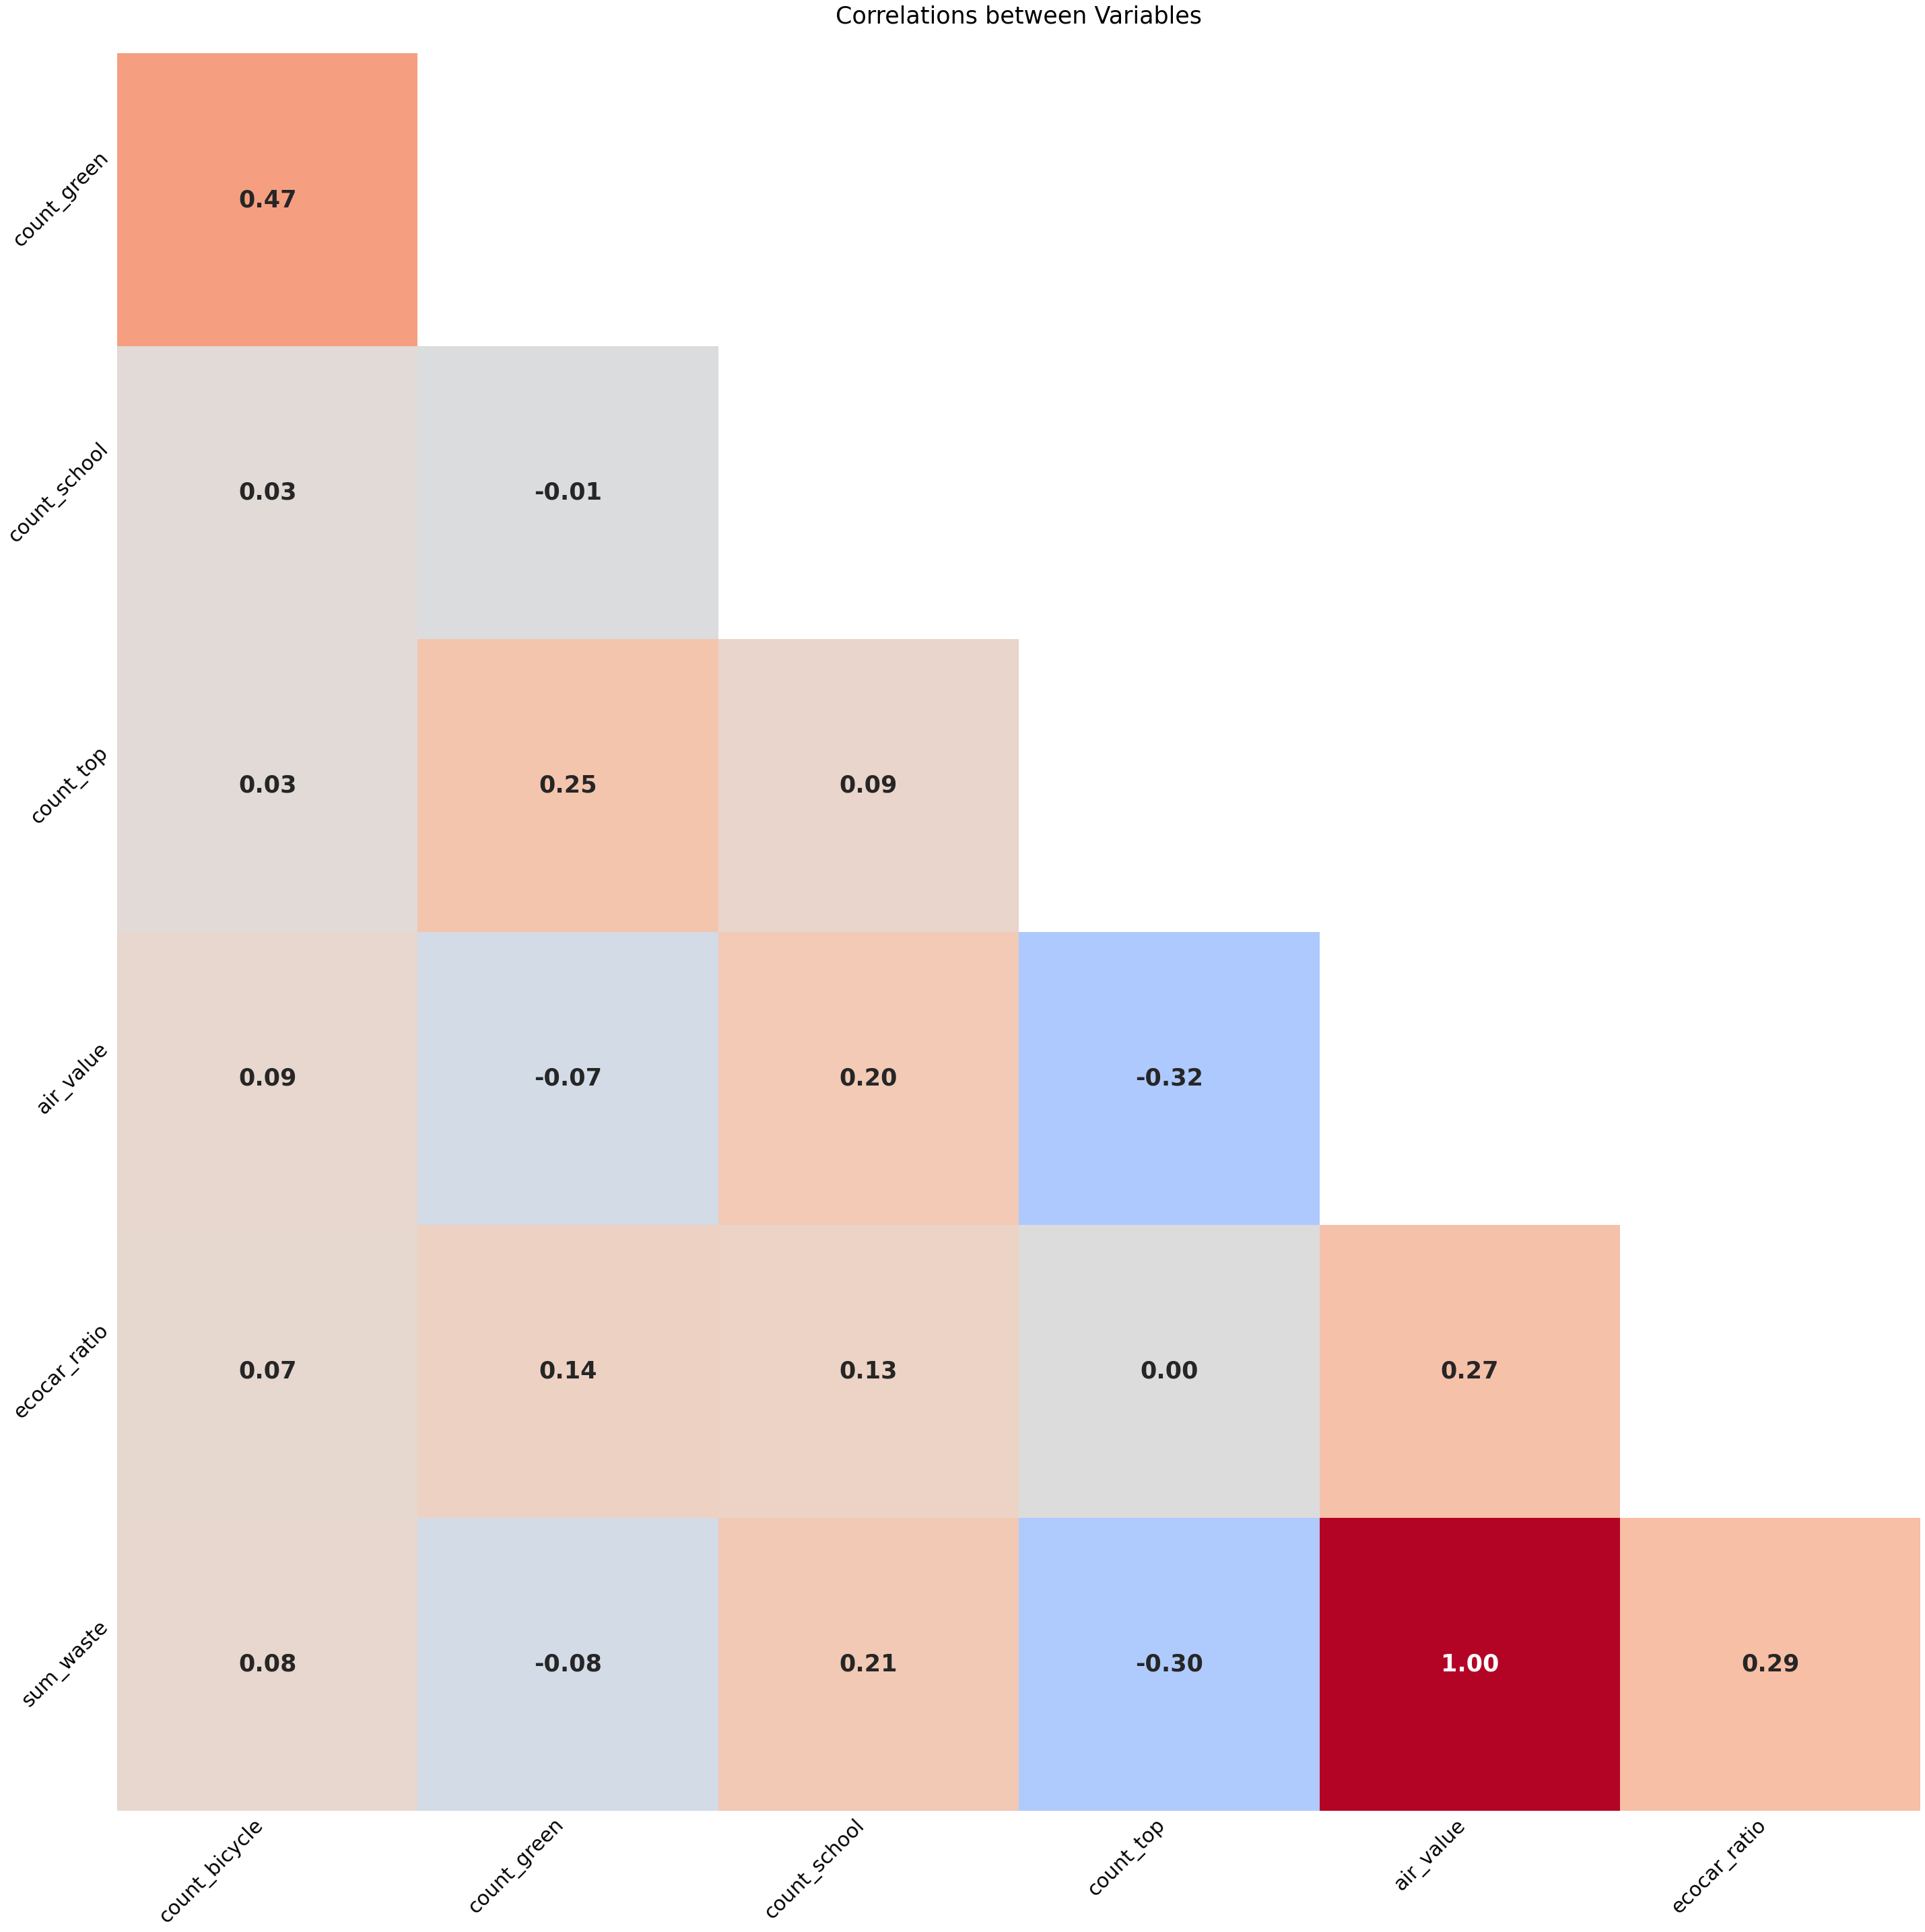

In [145]:
corr=ecov.corr()
mask=np.triu(np.ones_like(corr, dtype=bool))[1:,:-1]
corr=corr.iloc[1:,:-1].copy()
fig, ax = plt.subplots(figsize=(48,48))   
sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, center=0, annot=True, fmt='.2f', 
            cmap='coolwarm', annot_kws={'fontsize':35,'fontweight':'bold'}, cbar=False)
ax.tick_params(left=False,bottom=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right',fontsize=30)
ax.set_yticklabels(ax.get_yticklabels(), rotation=45, fontsize=30)
plt.title('Correlations between Variables\n', fontsize=35)
fig.show()

In [129]:
# 정규화를 통해 값의 범위를 일정하게 조정
scaler = MinMaxScaler()
data = scaler.fit_transform(ecov)

df_norm = pd.DataFrame(data, index = list(ecov.index), columns=list(ecov.columns))
df_norm

,count_bicycle,count_green,count_school,count_top,air_value,ecocar_ratio,sum_waste
0,0.24,0.666667,0.25,0.000000,0.73029,0.175704,0.680603
1,0.16,0.000000,0.50,0.058824,0.73029,0.095426,0.680603
2,0.24,0.037037,0.50,0.117647,0.73029,0.035444,0.680603
3,0.08,0.074074,0.75,0.000000,1.00000,0.103302,1.000000
4,0.48,0.185185,1.00,0.000000,1.00000,0.148137,1.000000
...,...,...,...,...,...,...,...
59,0.12,0.111111,0.00,0.000000,0.73029,0.048470,0.680603
60,0.44,0.444444,0.75,0.176471,0.73029,0.083308,0.680603
61,0.12,0.296296,0.00,0.352941,0.00000,0.094517,0.000000
62,0.04,0.000000,0.00,0.058824,0.00000,0.054226,0.000000


In [134]:
# predictors = ['count_bicycle', 'count_green', 'count_school', 'count_top', 'ecocar_ratio','sum_waste']
predictors = ['count_bicycle', 'count_green', 'count_school', 'count_top', 'ecocar_ratio']
outcome = "air_value"

X = df_norm[predictors]
y = df_norm[outcome]

train_X, vaild_X, train_y, vaild_y = train_test_split(X, Y, test_size=0.4, random_state=1) 

eco_lm = LinearRegression()
eco_lm.fit(train_X, train_y)

print("Intercept", eco_lm.intercept_)
print()
print(pd.DataFrame({'Preditior': X.columns, 'coefficient': eco_lm.coef_}))

Intercept 0.3878372732873699

       Preditior  coefficient
0  count_bicycle     0.144807
1    count_green     0.219776
2   count_school    -0.239078
3      count_top     1.104844
4   ecocar_ratio    -0.526297


In [137]:
## 가장 중요한 변수를 찾기위해 전역탐색 이용
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    pred_y = model.predict(train_X[variables])
    # we negate as score is optimized to be as low as possible
    return -adjusted_r2_score(train_y, pred_y, model)

In [138]:
allVariables = train_X.columns
results = exhaustive_search(allVariables, train_model, score_model)

In [139]:
data = []
for result in results:
    model = result['model']
    variables = result['variables']
    AIC = AIC_score(train_y, model.predict(train_X[variables]), model)
    
    d = {'n': result['n'], 'r2adj': -result['score'], 'AIC': AIC}
    d.update({var: var in result['variables'] for var in allVariables})
    data.append(d)
pd.set_option('display.width', 100)
print(pd.DataFrame(data, columns=('n', 'r2adj', 'AIC') + tuple(sorted(allVariables))))
pd.reset_option('display.width') # AIC값이 낮을 수록 좋음

   n     r2adj        AIC  count_bicycle  count_green  count_school  count_top  ecocar_ratio
0  1  0.092868  36.028254          False        False         False       True         False
1  2  0.156701  34.185051          False        False         False       True          True
2  3  0.182065  33.923071          False        False          True       True          True
3  4  0.200252  33.934176          False         True          True       True          True
4  5  0.183082  35.572055           True         True          True       True          True


In [140]:
## 예측변수를 줄이기 위해 단계적 회귀
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_X[variables]), model)

In [141]:
best_model, best_variables = stepwise_selection(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: count_bicycle, count_green, count_school, count_top, ecocar_ratio
Start: score=38.77, constant
Step: score=36.03, add count_top
Step: score=34.19, add ecocar_ratio
Step: score=33.92, add count_school
Step: score=33.92, unchanged None
['count_top', 'ecocar_ratio', 'count_school']


In [142]:
predictors = ['count_top', 'ecocar_ratio','sum_waste']
outcome = "air_value"

X = pd.get_dummies(df_norm[predictors], drop_first=True)
Y = df_norm[outcome]

train_X, vaild_X, train_y, vaild_y = train_test_split(X, Y, test_size=0.4, random_state=1) 

eco_lm = LinearRegression()
eco_lm.fit(train_X, train_y)

print("Intercept", eco_lm.intercept_)
print()
print(pd.DataFrame({'Preditior': X.columns, 'coefficient': eco_lm.coef_}))

Intercept 0.05316043294882167

      Preditior  coefficient
0     count_top    -0.122888
1  ecocar_ratio    -0.036858
2     sum_waste     0.976528


In [147]:
ecov = df[['count_bicycle',
       'count_green', 'count_school', 'count_top', 'ecocar_ratio']]

scaler = MinMaxScaler()
data = scaler.fit_transform(ecov)

df_norm = pd.DataFrame(data, index = list(ecov.index), columns=list(ecov.columns))

# predictors = ['count_bicycle', 'count_green', 'count_school', 'count_top', 'ecocar_ratio','sum_waste']
predictors = ['count_bicycle', 'count_green', 'count_school', 'count_top', 'ecocar_ratio']
outcome = "air_value"

X = df_norm[predictors]
y = df_norm[outcome]

train_X, vaild_X, train_y, vaild_y = train_test_split(X, Y, test_size=0.4, random_state=1) 

eco_lm = LinearRegression()
eco_lm.fit(train_X, train_y)

print("Intercept", eco_lm.intercept_)
print()
print(pd.DataFrame({'Preditior': X.columns, 'coefficient': eco_lm.coef_}))

,count_bicycle,count_green,count_school,count_top,ecocar_ratio
0,7,18,1,0,0.0936
1,5,0,2,1,0.0671
2,7,1,2,2,0.0473
3,3,2,3,0,0.0697
4,13,5,4,0,0.0845
...,...,...,...,...,...
59,4,3,0,0,0.0516
60,12,12,3,3,0.0631
61,4,8,0,6,0.0668
62,2,0,0,1,0.0535
